# Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
filepath = '/content/drive/MyDrive/DATA 1202 Project/Bank Customer Churn Prediction.csv'
df = pd.read_csv(filepath)
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


# Explotary Data Analysis & Data Cleaning

In [5]:
df.isna().sum().sort_values(ascending=False)

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [6]:
df.duplicated().sum()

0

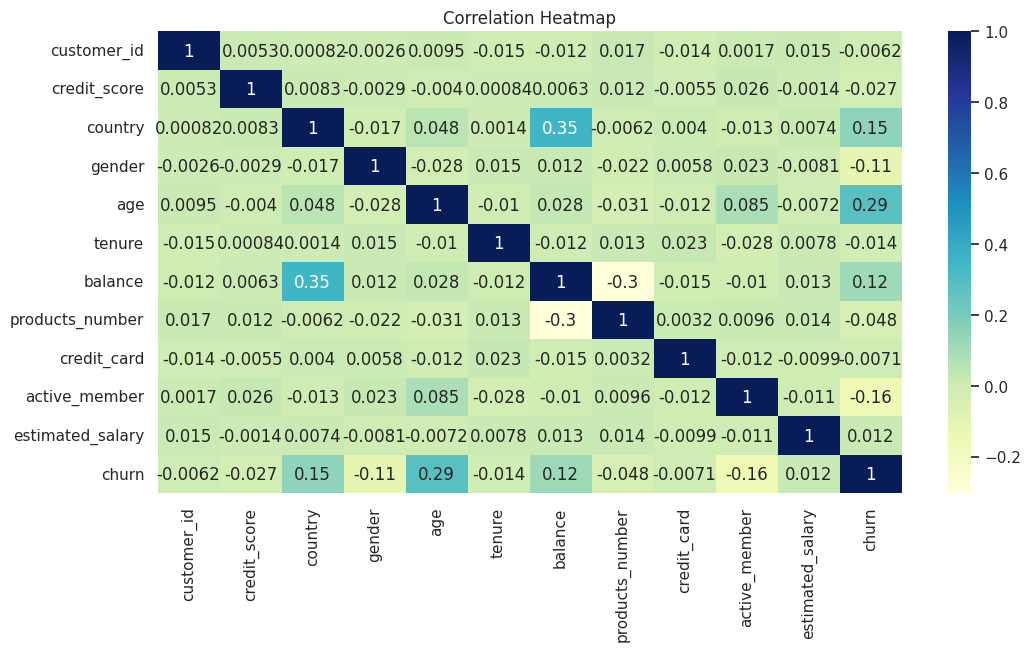

In [7]:
df1 = df.copy()

sns.set(style="whitegrid")

df1['country'] = df1['country'].map({'France': 0, 'Spain': 1, 'Germany': 2})

df1['gender'] = df1['gender'].map({'Female': 0, 'Male': 1})

plt.figure(figsize=(12, 6))
sns.heatmap(df1.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap')
plt.show()

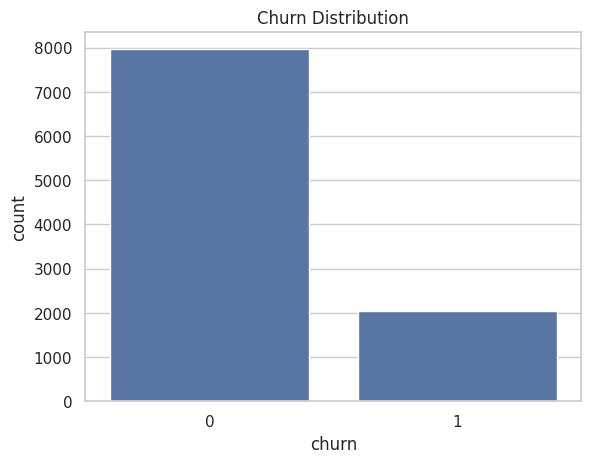

In [8]:
sns.set(style="whitegrid")

sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.show()

<Axes: xlabel='credit_score'>

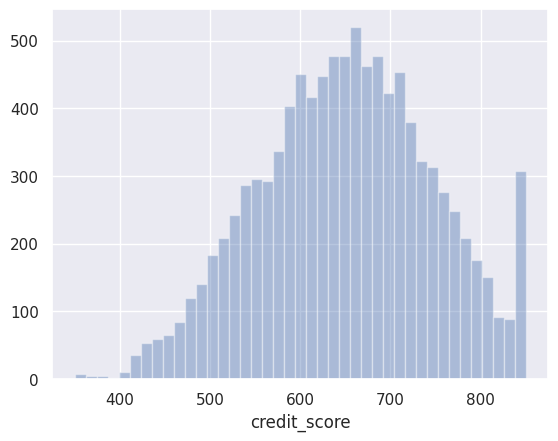

In [9]:
sns.set(style="darkgrid")

sns.distplot( a=df["credit_score"],hist=True, kde=False, rug=False )

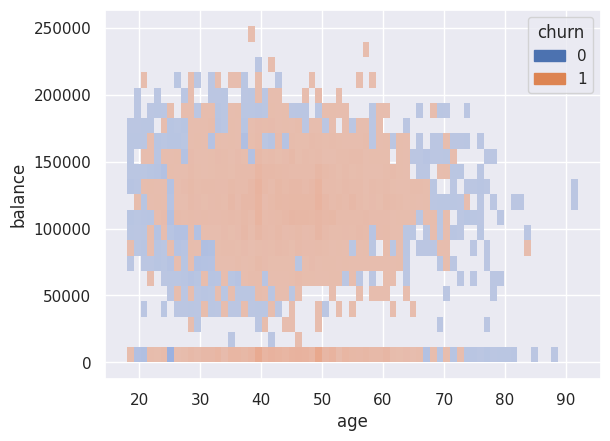

In [10]:
sns.histplot(
    data=df,
    x="age",
    y="balance",
    hue="churn",
)
plt.show()

<Axes: xlabel='products_number', ylabel='balance'>

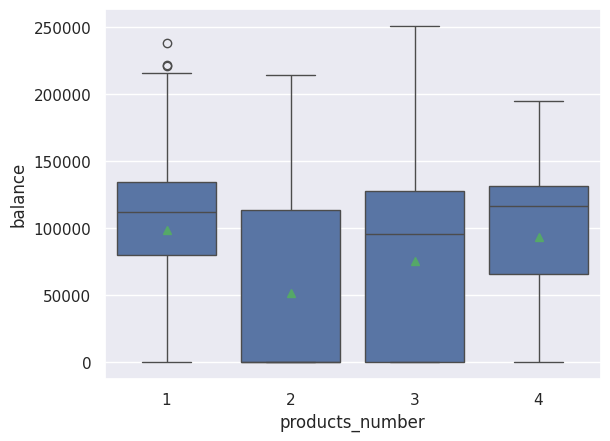

In [11]:
sns.boxplot(
    x="products_number",
    y="balance",
    showmeans=True,
    data=df
)

<Axes: xlabel='country', ylabel='Count'>

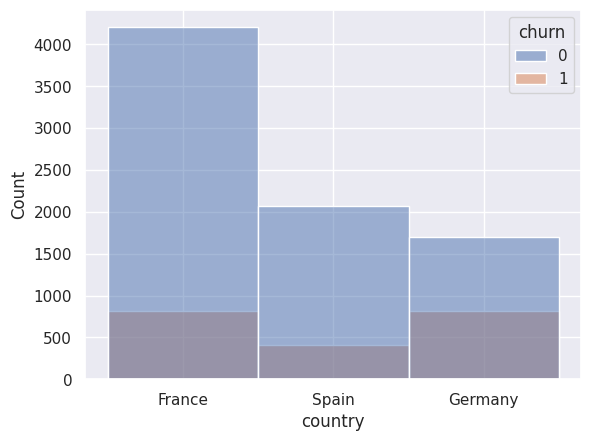

In [12]:
sns.histplot(
    data=df,
    x="country",
    hue="churn")

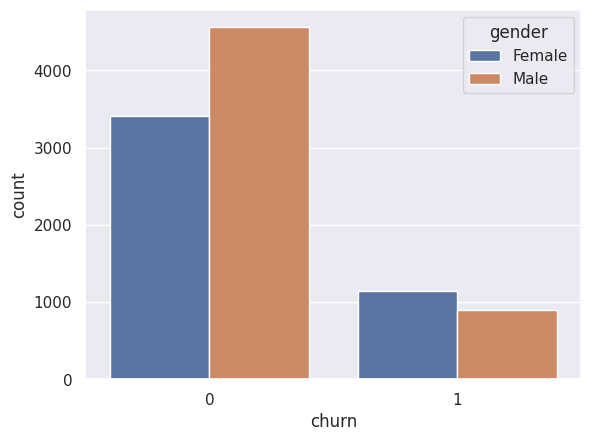

In [13]:
sns.countplot(x="churn",hue="gender", data=df)
plt.show()

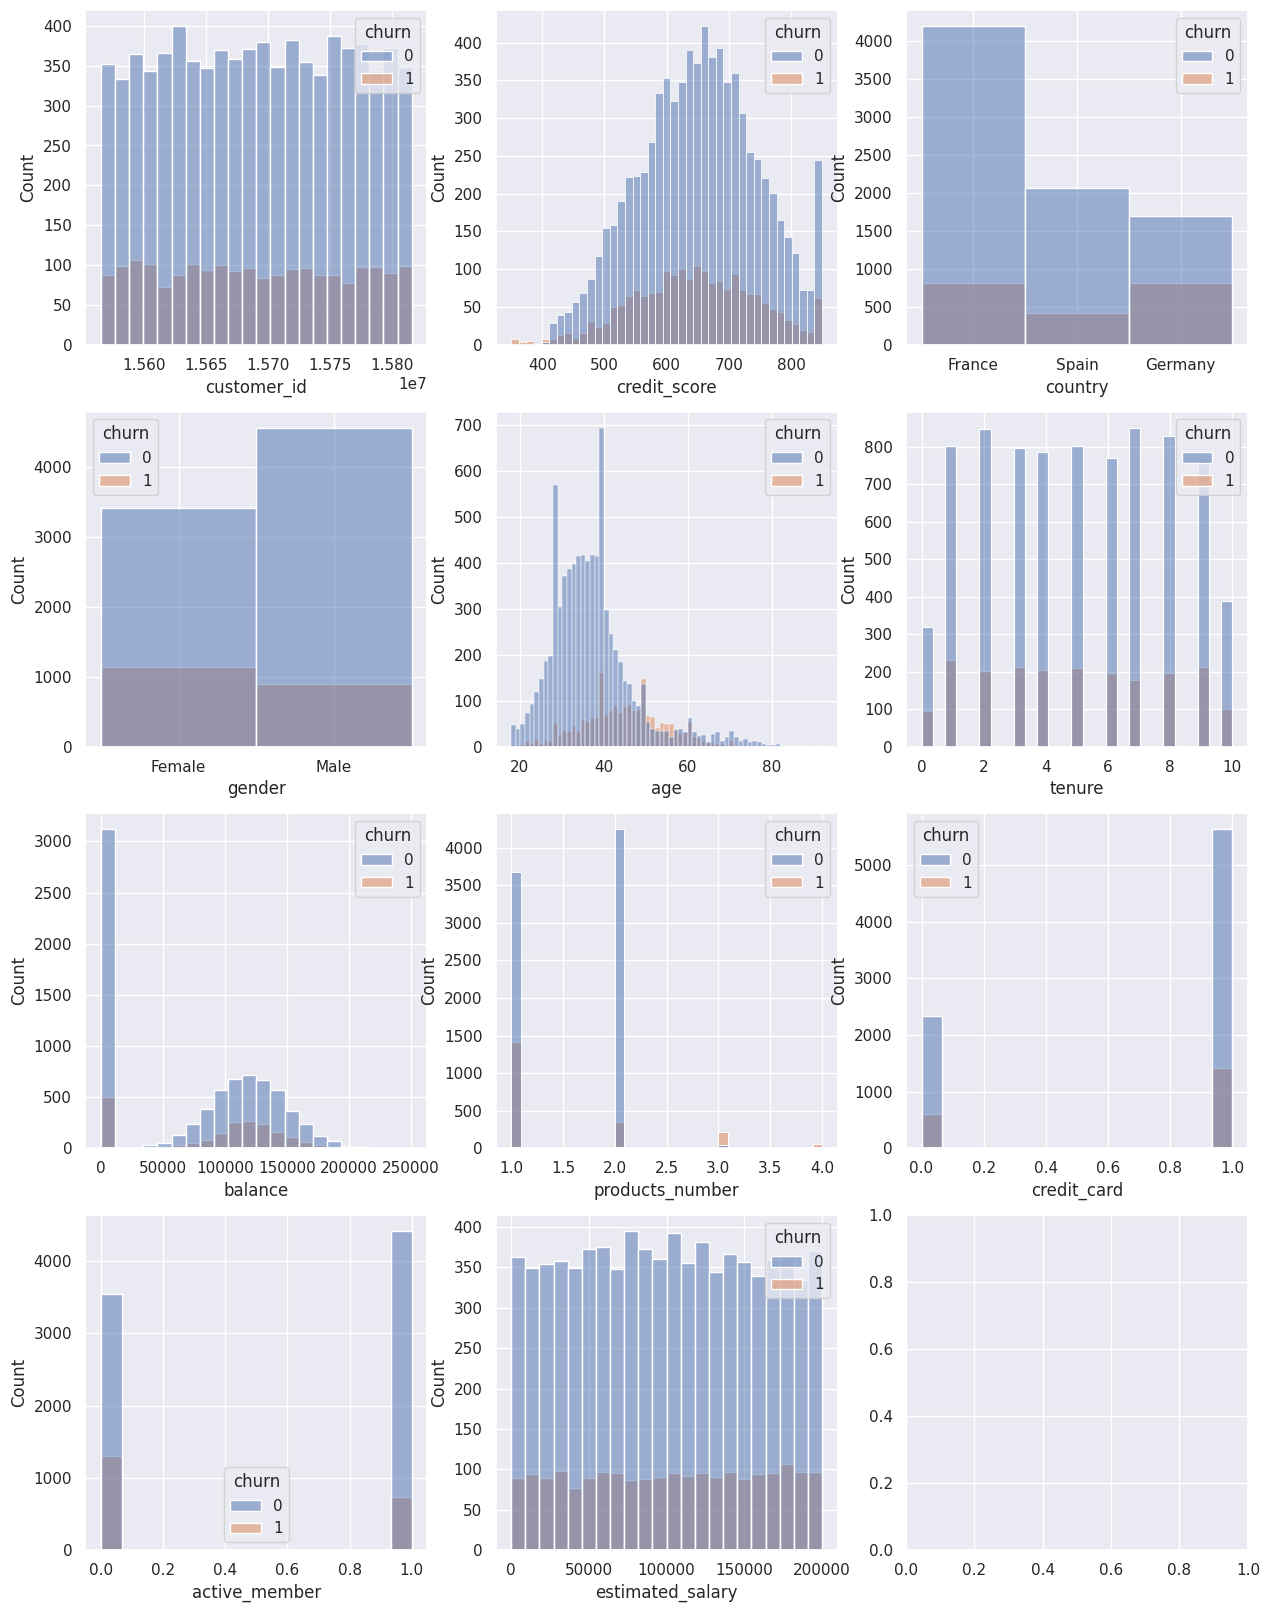

In [14]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,20))
axs=axs.flat
for i in range(len(df.columns)-1):
    sns.histplot(data=df, x=df.columns[i],hue="churn",ax=axs[i])

# Data Preprocessing and Feature Engineering

In [15]:
df['country'] = df['country'].map({'France': 0, 'Spain': 1, 'Germany': 2})

df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

In [16]:
data = df.copy()

X = data.drop(columns=['churn'])
y = data['churn']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Principal Component Analysis

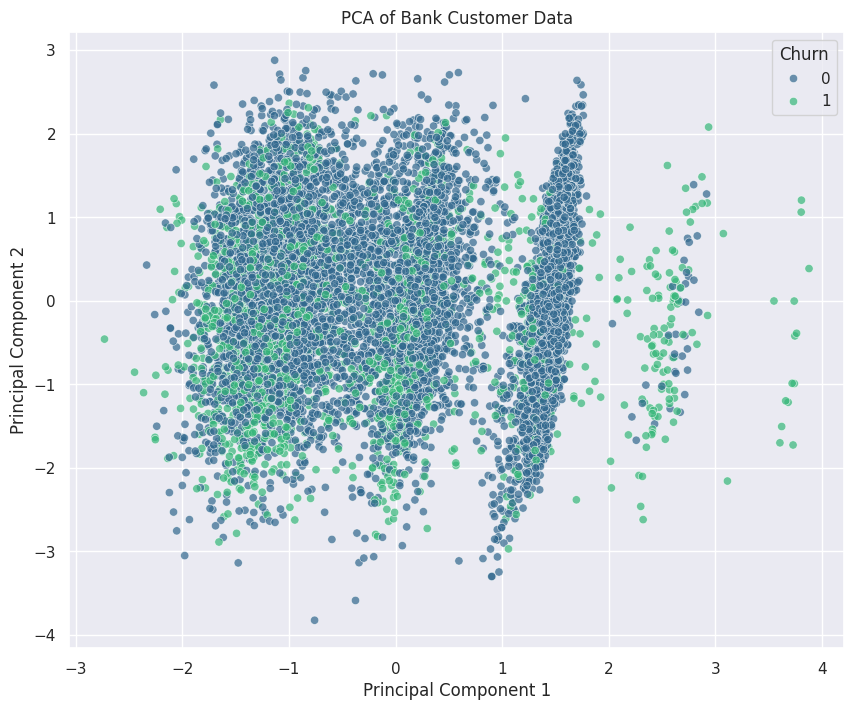

Explained Variance Ratio: [0.21851529 0.16891898]


In [18]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Select numerical features for PCA
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
X = df[numerical_features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Churn'] = df['churn']

# Visualize the results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 2',
                hue='Churn', palette='viridis', alpha=0.7)
plt.title('PCA of Bank Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Churn', loc='best')
plt.show()

# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


# Logistic Regression

In [19]:
from math import log
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)

y_pred = logreg_model.predict(x_test)

print("     Confusion Matrix ")
print(confusion_matrix(y_test, y_pred))

print()

print("     Classification Report ")
print()
print(classification_report(y_test, y_pred))

log_reg_report = classification_report(y_test, y_pred, output_dict=True)

     Confusion Matrix 
[[1537   51]
 [ 340   72]]

     Classification Report 

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1588
           1       0.59      0.17      0.27       412

    accuracy                           0.80      2000
   macro avg       0.70      0.57      0.58      2000
weighted avg       0.77      0.80      0.76      2000



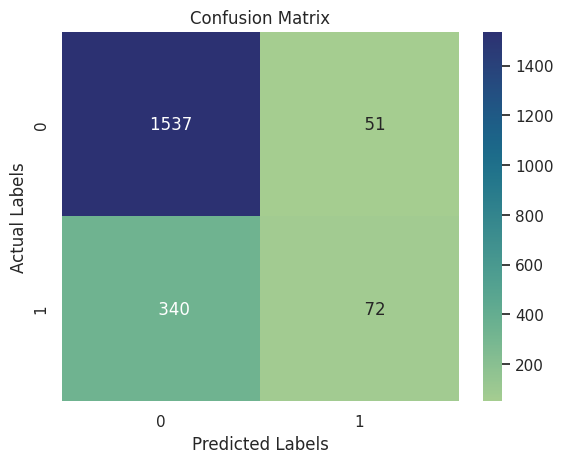

In [20]:
#Plot the confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred),cmap='crest',annot=True,fmt='8')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# Naive Bayes


In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

y_pred = nb_model.predict(x_test)

print("     Confusion Matrix ")
print(confusion_matrix(y_test, y_pred))

print()

print("     Classification Report ")
print()
print(classification_report(y_test, y_pred))

nb_model_report = classification_report(y_test, y_pred, output_dict=True)

     Confusion Matrix 
[[1536   52]
 [ 301  111]]

     Classification Report 

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1588
           1       0.68      0.27      0.39       412

    accuracy                           0.82      2000
   macro avg       0.76      0.62      0.64      2000
weighted avg       0.80      0.82      0.79      2000



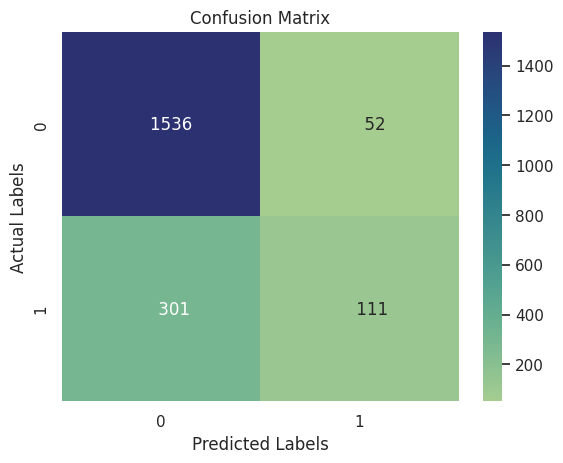

In [22]:
#Plot the confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred),cmap='crest',annot=True,fmt='8')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree & Random Forest Classfier


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

y_pred = dt_model.predict(x_test)

print("     Confusion Matrix ")
print(confusion_matrix(y_test, y_pred))

print()

print("     Classification Report ")
print()
print(classification_report(y_test, y_pred))

dt_model_report = classification_report(y_test, y_pred, output_dict=True)

     Confusion Matrix 
[[1368  220]
 [ 216  196]]

     Classification Report 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1588
           1       0.47      0.48      0.47       412

    accuracy                           0.78      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.78      0.78      0.78      2000



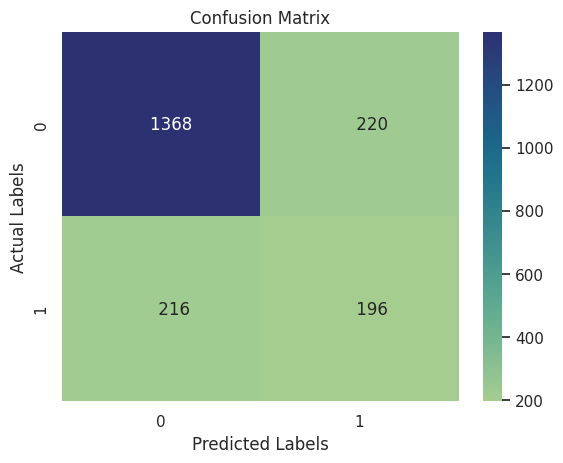

In [24]:
#Plot the confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred),cmap='crest',annot=True,fmt='8')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

print("     Confusion Matrix ")
print(confusion_matrix(y_test, y_pred))

print()

print("     Classification Report ")
print()
print(classification_report(y_test, y_pred))

rf_model_report = classification_report(y_test, y_pred, output_dict=True)

     Confusion Matrix 
[[1533   55]
 [ 235  177]]

     Classification Report 

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1588
           1       0.76      0.43      0.55       412

    accuracy                           0.85      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.85      0.84      2000



In [26]:
# feature_names = X.columns

# feature_importance = pd.Series(rf_model.feature_importances_, index=feature_names).sort_values(ascending=True)
# feature_importance.plot(kind='barh')
# plt.xlabel('Feature Importance')
# plt.ylabel('Features')
# plt.title('Feature Importance in Random Forest')
# plt.tight_layout()
# plt.show()

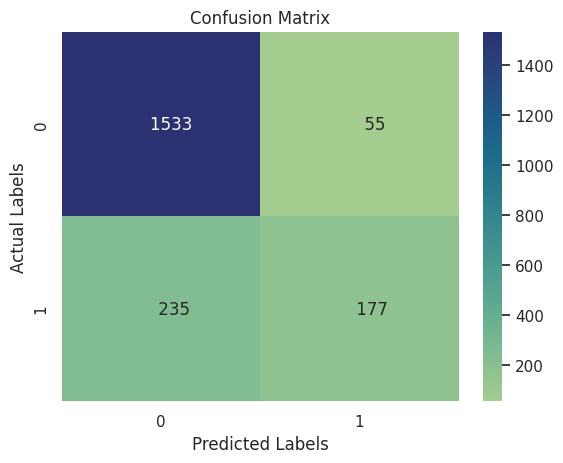

In [27]:
#Plot the confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred),cmap='crest',annot=True,fmt='8')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# Neural Network


In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

nn_model = MLPClassifier(hidden_layer_sizes=(10, 5, 3), max_iter=1000, random_state=42)
nn_model.fit(x_train, y_train)

y_pred = nn_model.predict(x_test)

print("     Confusion Matrix ")
print(confusion_matrix(y_test, y_pred))

print()

print("     Classification Report ")
print()
print(classification_report(y_test, y_pred))

print()
print("     Accuracy Score ")
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%')

nn_model_report = classification_report(y_test, y_pred, output_dict=True)

     Confusion Matrix 
[[1529   59]
 [ 235  177]]

     Classification Report 

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1588
           1       0.75      0.43      0.55       412

    accuracy                           0.85      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000


     Accuracy Score 
85.30%


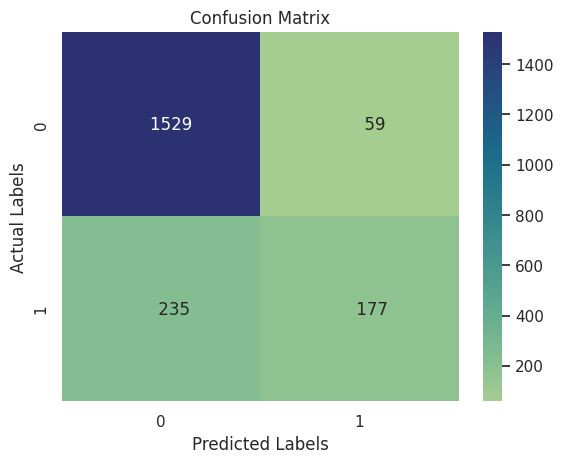

In [29]:
#Plot the confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred),cmap='crest',annot=True,fmt='8')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# Model Comparison

In [30]:
data = {
    'Model': ['Logistic Regression', 'Neural Network', 'Decision Tree', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [log_reg_report['accuracy'], nn_model_report['accuracy'], dt_model_report['accuracy'], nb_model_report['accuracy'], rf_model_report['accuracy']],
    'Precision': [log_reg_report['1']['precision'], nn_model_report['1']['precision'], dt_model_report['1']['precision'], nb_model_report['1']['precision'], rf_model_report['1']['precision']],
    'Recall': [log_reg_report['1']['recall'], nn_model_report['1']['recall'], dt_model_report['1']['recall'], nb_model_report['1']['recall'], rf_model_report['1']['recall']],
    'F1-Score': [log_reg_report['1']['f1-score'], nn_model_report['1']['f1-score'], dt_model_report['1']['f1-score'], nb_model_report['1']['f1-score'], rf_model_report['1']['f1-score']]
}

df = pd.DataFrame(data)

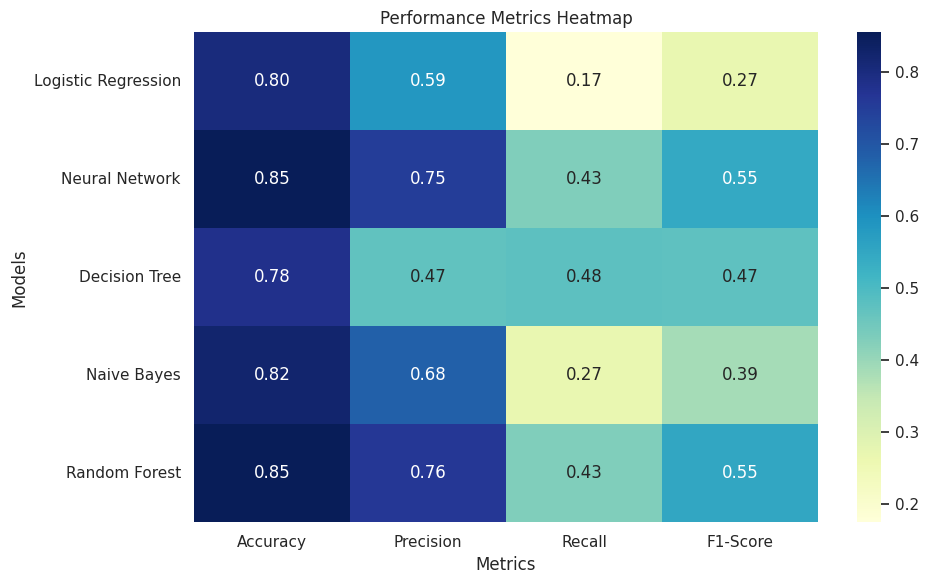

In [31]:
df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

df_heatmap = df.set_index('Model')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Performance Metrics Heatmap')
plt.ylabel('Models')
plt.xlabel('Metrics')
plt.tight_layout()
plt.show()

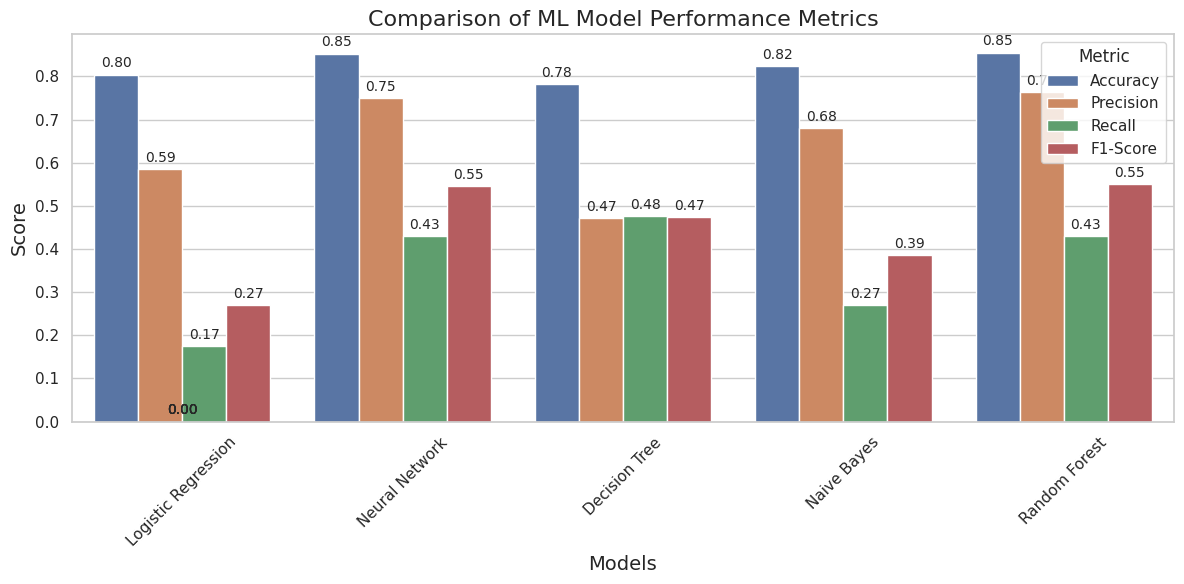

In [32]:
sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted)


for bar in barplot.patches:
    bar_height = bar.get_height()
    bar_x = bar.get_x() + bar.get_width() / 2
    plt.text(bar_x, bar_height + 0.01, f'{bar_height:.2f}', ha='center', va='bottom', fontsize=10)

# Customize plot
plt.title('Comparison of ML Model Performance Metrics', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()

# Show plot
plt.show()

# ROC/AUC Curve

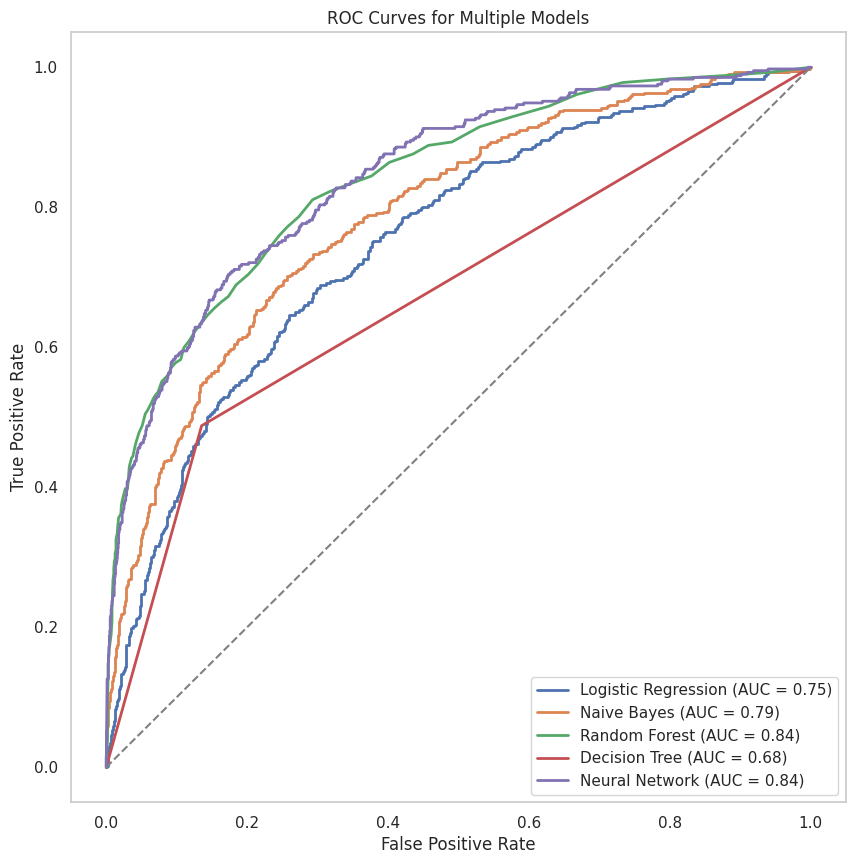

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(10, 5, 3), max_iter=1000, random_state=42)
}

# Plot ROC curves
plt.figure(figsize=(10, 10))
for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)

    # Predict probabilities
    y_pred = model.predict_proba(x_test)[:, 1]

    # Compute ROC curve and AUC score
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    # Plot the ROC curve
    plt.plot(fpr, tpr,linewidth=2,label=f"{name} (AUC = {auc:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Models')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Adding Changes

In [49]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

x1_train, x1_test, y1_train, y1_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=100)

In [50]:
logreg_model1 = LogisticRegression()
logreg_model1.fit(x1_train, y1_train)

y_pred = logreg_model1.predict(x1_test)

print("     Confusion Matrix ")
print(confusion_matrix(y1_test, y_pred))

print()

print("     Classification Report ")
print()
print(classification_report(y1_test, y_pred))

log_reg_report1 = classification_report(y1_test, y_pred, output_dict=True)

     Confusion Matrix 
[[ 986  576]
 [ 532 1092]]

     Classification Report 

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1562
           1       0.65      0.67      0.66      1624

    accuracy                           0.65      3186
   macro avg       0.65      0.65      0.65      3186
weighted avg       0.65      0.65      0.65      3186



In [51]:
dt_model1 = DecisionTreeClassifier()
dt_model1.fit(x1_train, y1_train)

y_pred = dt_model1.predict(x1_test)

print("     Confusion Matrix ")
print(confusion_matrix(y1_test, y_pred))

print()

print("     Classification Report ")
print()
print(classification_report(y1_test, y_pred))

dt_model_report1 = classification_report(y1_test, y_pred, output_dict=True)

     Confusion Matrix 
[[1132  430]
 [ 394 1230]]

     Classification Report 

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1562
           1       0.74      0.76      0.75      1624

    accuracy                           0.74      3186
   macro avg       0.74      0.74      0.74      3186
weighted avg       0.74      0.74      0.74      3186



In [52]:
rf_model1 = RandomForestClassifier()
rf_model1.fit(x1_train, y1_train)

y_pred = rf_model1.predict(x1_test)

print("     Confusion Matrix ")
print(confusion_matrix(y1_test, y_pred))

print()

print("     Classification Report ")
print()
print(classification_report(y1_test, y_pred))

rf_model_report1 = classification_report(y1_test, y_pred, output_dict=True)


     Confusion Matrix 
[[1220  342]
 [ 296 1328]]

     Classification Report 

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1562
           1       0.80      0.82      0.81      1624

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



In [53]:
nb_model1 = GaussianNB()
nb_model1.fit(x1_train, y1_train)

y_pred = nb_model1.predict(x1_test)

print("     Confusion Matrix ")
print(confusion_matrix(y1_test, y_pred))

print()

print("     Classification Report ")
print()
print(classification_report(y1_test, y_pred))

nb_model_report1 = classification_report(y1_test, y_pred, output_dict=True)


     Confusion Matrix 
[[1061  501]
 [ 474 1150]]

     Classification Report 

              precision    recall  f1-score   support

           0       0.69      0.68      0.69      1562
           1       0.70      0.71      0.70      1624

    accuracy                           0.69      3186
   macro avg       0.69      0.69      0.69      3186
weighted avg       0.69      0.69      0.69      3186



In [54]:
nn_model1 = MLPClassifier(hidden_layer_sizes=(10, 5, 3), max_iter=1000, random_state=150)

nn_model1.fit(x1_train, y1_train)

y_pred = nn_model1.predict(x1_test)

print("     Confusion Matrix ")
print(confusion_matrix(y1_test, y_pred))

print()

print("     Classification Report ")
print()
print(classification_report(y1_test, y_pred))

nn_model_report1 = classification_report(y1_test, y_pred, output_dict=True)

     Confusion Matrix 
[[ 608  954]
 [ 449 1175]]

     Classification Report 

              precision    recall  f1-score   support

           0       0.58      0.39      0.46      1562
           1       0.55      0.72      0.63      1624

    accuracy                           0.56      3186
   macro avg       0.56      0.56      0.55      3186
weighted avg       0.56      0.56      0.55      3186



In [55]:
data = {
    'Model': ['Logistic Regression', 'Neural Network', 'Decision Tree', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [log_reg_report1['accuracy'], nn_model_report1['accuracy'], dt_model_report1['accuracy'], nb_model_report1['accuracy'], rf_model_report1['accuracy']],
    'Precision': [log_reg_report1['1']['precision'], nn_model_report1['1']['precision'], dt_model_report1['1']['precision'], nb_model_report1['1']['precision'], rf_model_report1['1']['precision']],
    'Recall': [log_reg_report1['1']['recall'], nn_model_report1['1']['recall'], dt_model_report1['1']['recall'], nb_model_report1['1']['recall'], rf_model_report1['1']['recall']],
    'F1-Score': [log_reg_report1['1']['f1-score'], nn_model_report1['1']['f1-score'], dt_model_report1['1']['f1-score'], nb_model_report1['1']['f1-score'], rf_model_report1['1']['f1-score']]
}

df = pd.DataFrame(data)

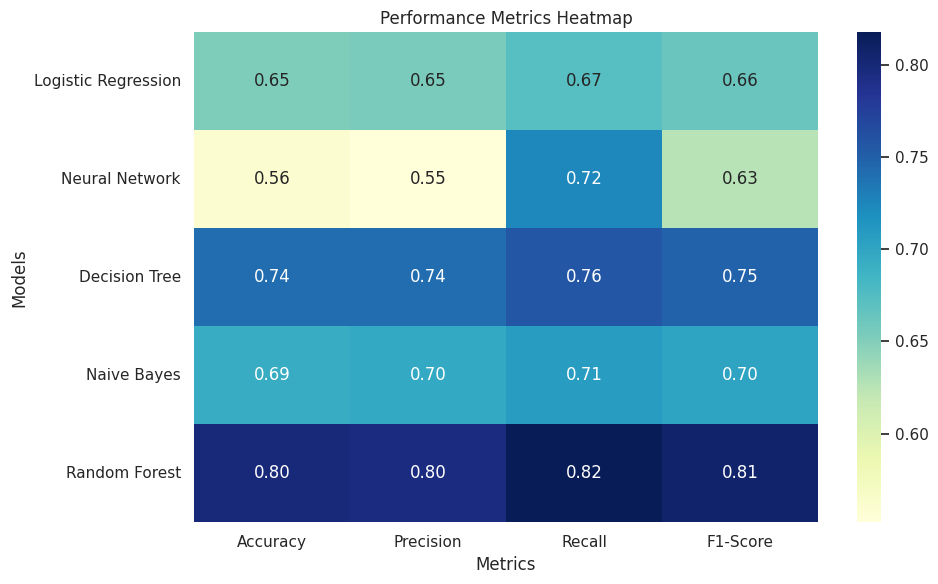

In [56]:
df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

df_heatmap = df.set_index('Model')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Performance Metrics Heatmap')
plt.ylabel('Models')
plt.xlabel('Metrics')
plt.tight_layout()
plt.show()